# DECISION TREE CLASSIFIER PREDICTION

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing

In [2]:
iris=pd.read_csv('Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species'])

In [4]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [5]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [6]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [7]:
iris['Species'].unique()

array([0, 1, 2])

In [8]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=40)

In [11]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

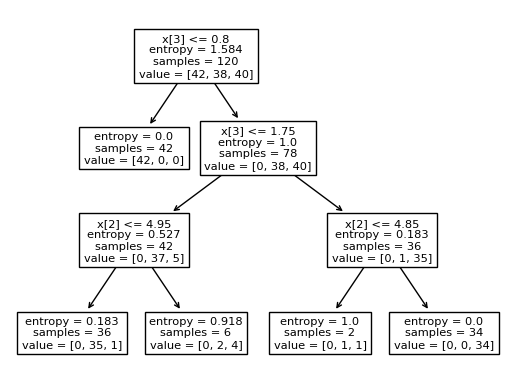

In [12]:
tree.plot_tree(model);

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

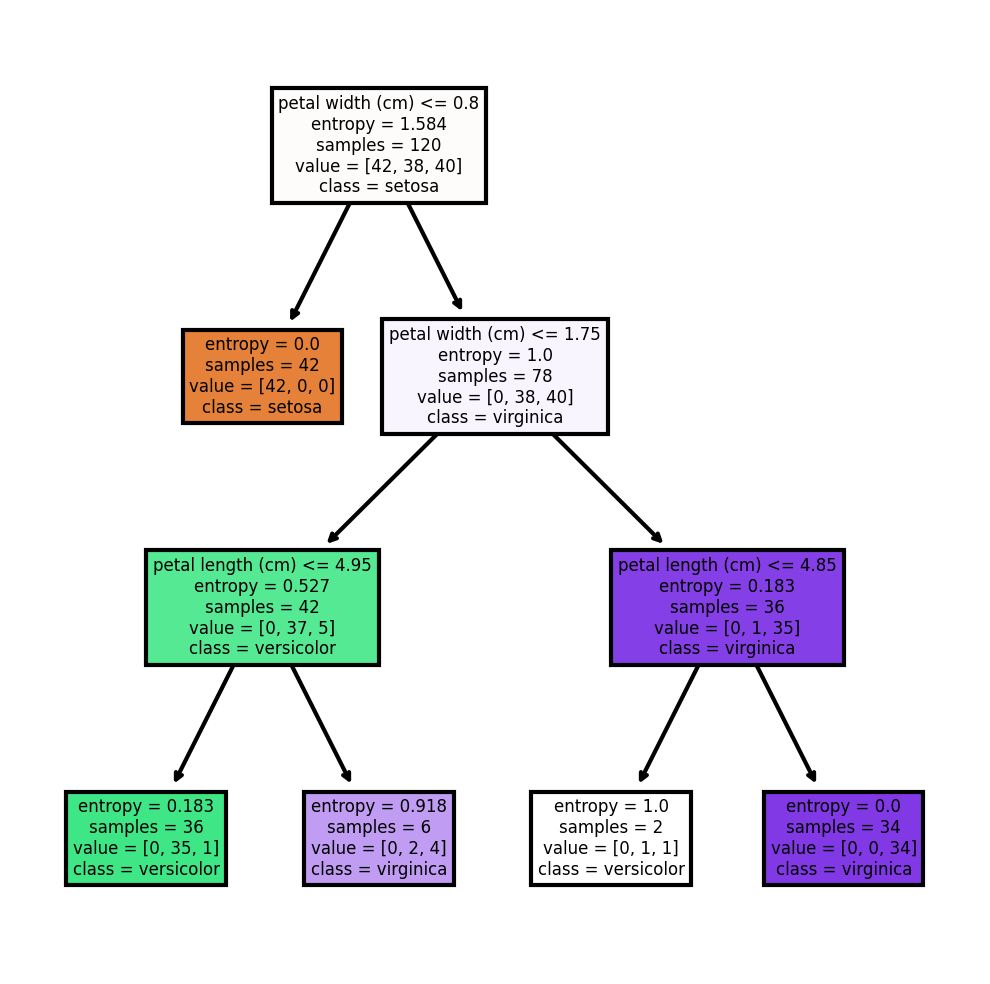

In [13]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled = True)

In [14]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

In [15]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [16]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [17]:
np.mean(preds==y_test)

0.9666666666666667

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [19]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

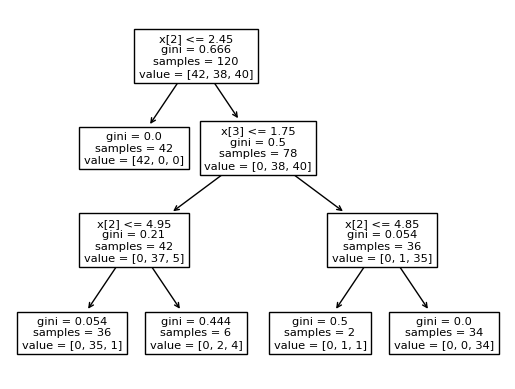

In [21]:
tree.plot_tree(model_gini)

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]\nclass = virginica'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = virginica')]

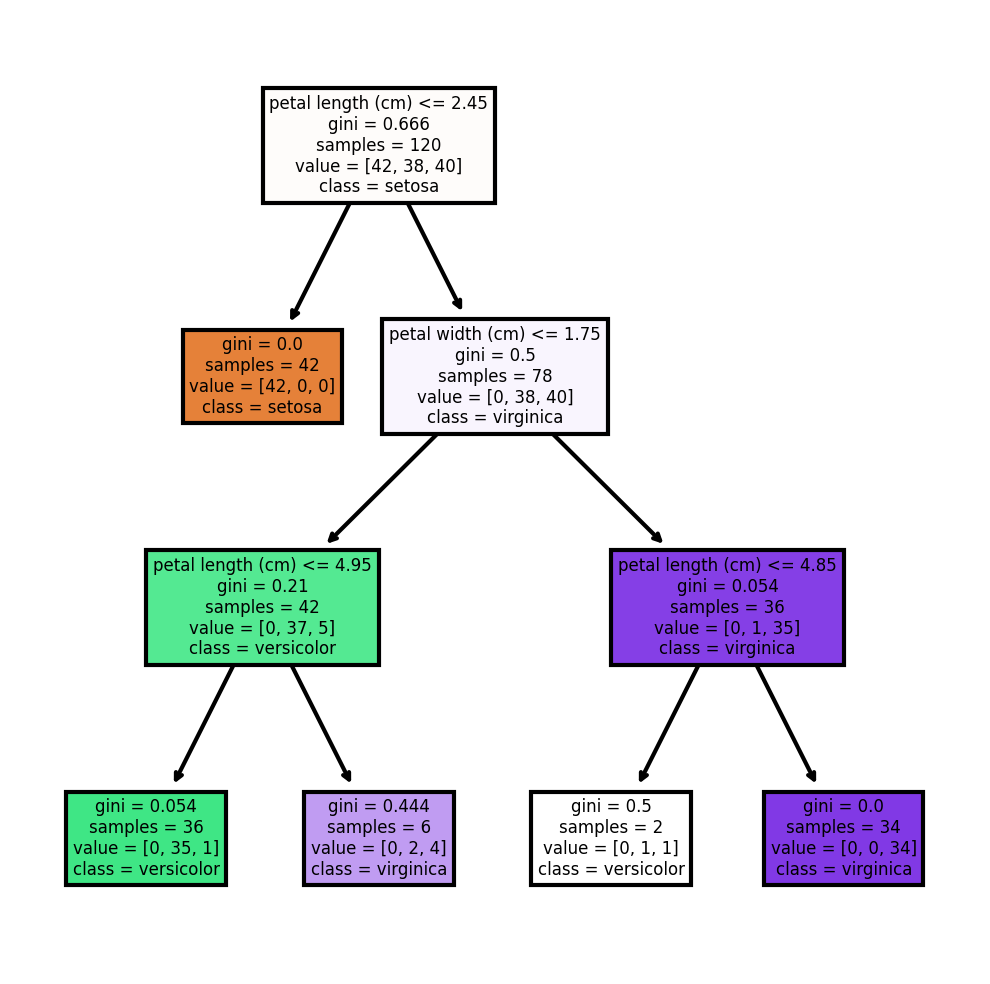

In [22]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize =(4,4),dpi=300)
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True)